In [1]:
%matplotlib

Using matplotlib backend: <object object at 0x10875ae40>


In [2]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [78]:
# Use the .fif files produced from kit2fiff packages
root_data_path = Path("/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG")
#/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"
raw_ICAed_path = meg_data_path / "LTTC_rawLDT_ICAed_fif"
print(root_data_path)

sub_id = 7

LDT_FIFfile = meg_data_path / Path('de%.3d-2-raw.fif' %sub_id) 
#LDT_raw =  mne.io.read_raw_kit(LDT_confile, stim = [195], preload=True) #, slope = '+') #slope=將3個stim_channel的訊號全部加成,讓訊號增強
                                                                #把原始的KIT資料讀進來
#LDT_raw.plot()
#events = mne.find_events(LDT_raw, stim_channel='STI 014') #將集合而成的channel命名為STI 014

LDT_raw = mne.io.read_raw_fif(LDT_FIFfile, preload=True)


#LDT_raw.plot()
n_LDT_raw = LDT_raw.copy()

n_LDT_raw.load_data().pick_types(meg=True, stim=True).filter(0, 30, phase='zero-double').resample(500)
print(n_LDT_raw.info)
#print(events.shape)

n_LDT_raw.plot()

/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG
Opening raw data file /Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results/de007-2-raw.fif...
    Range : 0 ... 369999 =      0.000 ...   369.999 secs
Ready.
Reading 0 ... 369999  =      0.000 ...   369.999 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s


120 events found on stim channel STI 014
Event IDs: [195]
120 events found on stim channel STI 014
Event IDs: [195]
<Info | 13 non-empty values
 bads: []
 ch_names: MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, MEG 007, ...
 chs: 157 Magnetometers, 1 Stimulus
 custom_ref_applied: False
 description: Academia Sinica/Institute of Linguistics//Magnetoencephalograph ...
 dev_head_t: MEG device -> head transform
 dig: 440 items (3 Cardinal, 5 HPI, 432 Extra)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 kit_system_id: 261 (Academia Sinica, 2008-)
 lowpass: 30.0 Hz
 meas_date: 2022-11-29 01:11:38 UTC
 meas_id: 4 items (dict)
 nchan: 158
 projs: []
 sfreq: 500.0 Hz
>
Using pyopengl with version 3.1.6


Channels marked as bad:
none


Fitting ICA to data using 157 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_23625/4238994491.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_LDT_raw)


Selecting by number: 15 components
Fitting ICA took 9.7s.
Creating RawArray with float64 data, n_channels=15, n_times=185000
    Range : 0 ... 184999 =      0.000 ...   369.998 secs
Ready.
Using pyopengl with version 3.1.6


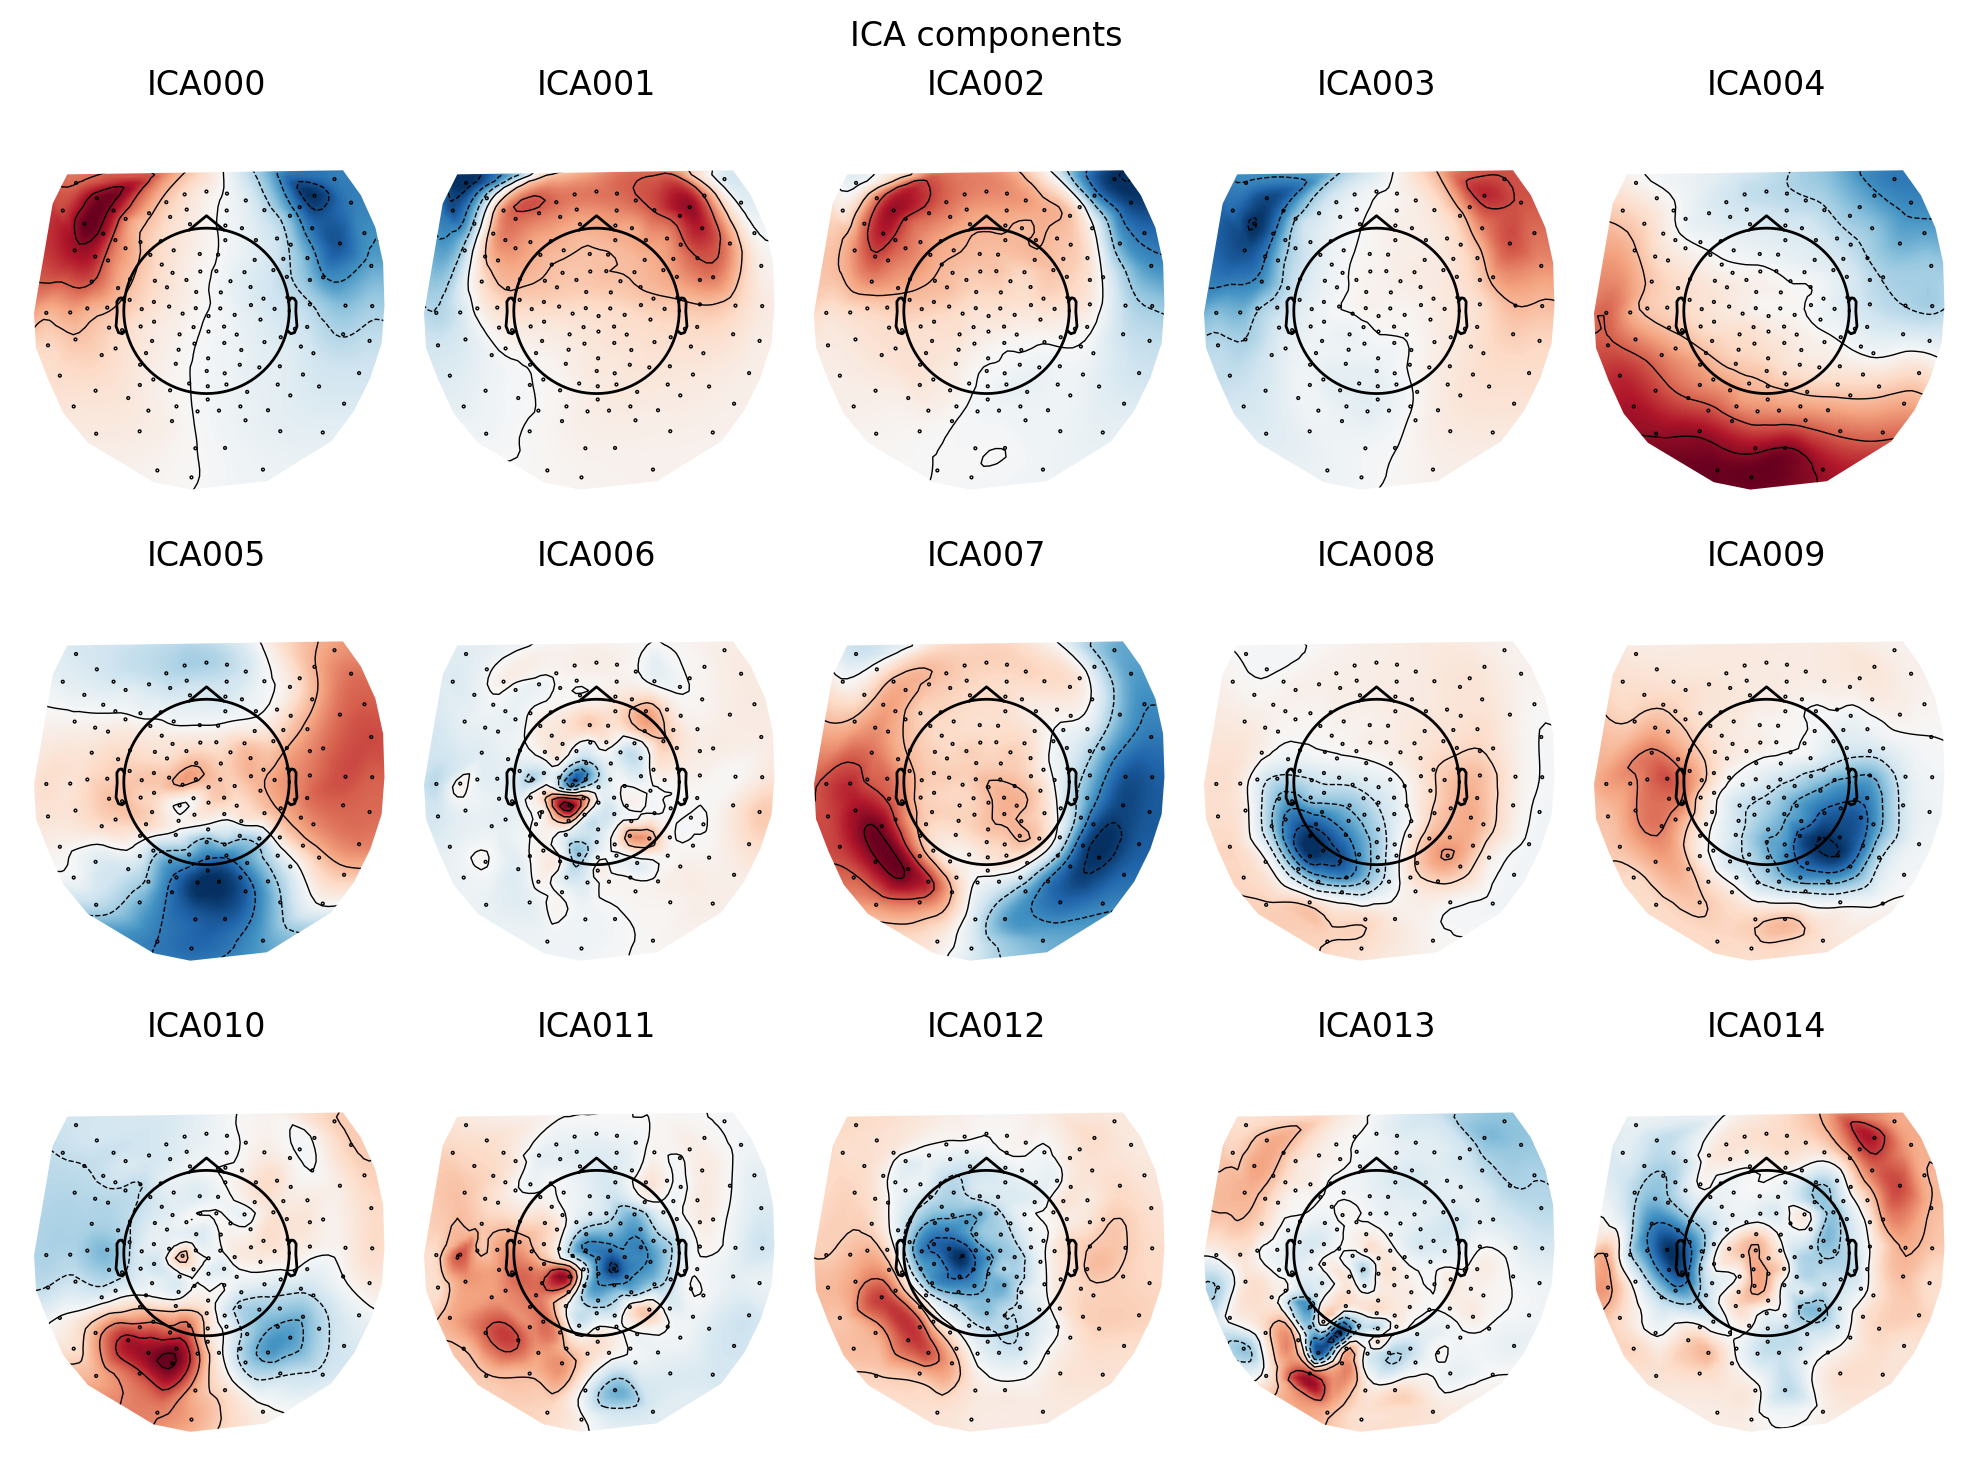

In [79]:
# ICA
ica_ = ICA(n_components=15, random_state=97)
ica_.fit(n_LDT_raw)
#ica_

#Plot ICA
ica_.plot_sources(n_LDT_raw)
ica_.plot_components()#sphere = (0.0, 0.02, 0.0, 0.065))  # What is this sphere for??
#ica_.plot_overlay(n_LDT_raw, exclude=[0, 5])  # 5 3 2 1

In [135]:
# Checking for every component
for i in range(15):
    #ica_.plot_properties(n_raw, picks=[i])
    ica_.plot_overlay(n_LDT_raw, exclude=[i])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing o

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 157 PCA components


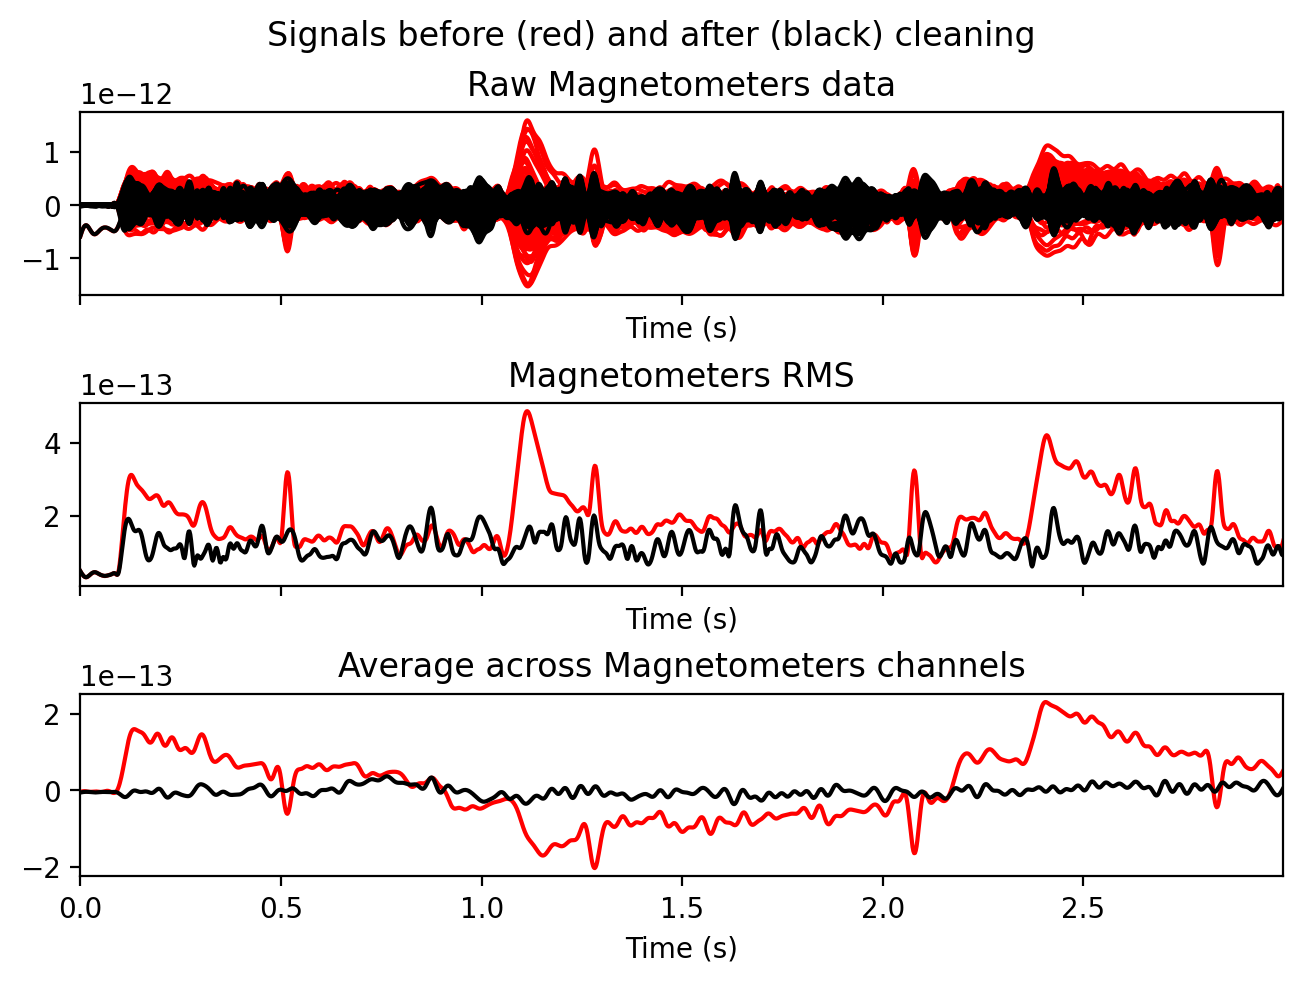

In [80]:
#ica_.plot_overlay(n_LDT_raw, exclude=[0, 1, 3, 7])
ica_.plot_overlay(n_LDT_raw, exclude=[0, 1, 2, 4])


In [81]:
# ICAed epochs
# excluding wanted components
ica_.exclude = [0, 1, 2, 4]
ica_.plot_overlay(n_LDT_raw, exclude=ica_.exclude)

ica_.apply(n_LDT_raw) #changes the Raw object in-place, so let's make a copy first:
#n_LDT_raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 157 PCA components


Measurement date,"11月 29, 2022 01:11:38 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,440 points
Good channels,"157 Magnetometers, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,30.00 Hz


In [82]:
n_LDT_raw.save(raw_ICAed_path / Path('S%.3d_rawLDT_ICAed.fif' %sub_id), overwrite=True)

Writing /Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results/LTTC_rawLDT_ICAed_fif/S007_rawLDT_ICAed.fif


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_23625/766722599.py:1: RuntimeWarning: This filename (/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results/LTTC_rawLDT_ICAed_fif/S007_rawLDT_ICAed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  n_LDT_raw.save(raw_ICAed_path / Path('S%.3d_rawLDT_ICAed.fif' %sub_id), overwrite=True)


Closing /Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results/LTTC_rawLDT_ICAed_fif/S007_rawLDT_ICAed.fif
[done]


In [24]:
# get to know the reason of bad epoch drop
print(epoch_LDT.drop_log)

((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ('MEG 117',), (), ())
